In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
data = pd.read_csv(r"C:\Users\zhang\Downloads\driver-data.csv")
data = data.drop(data.columns[0], axis=1)
data = data.to_numpy()
display(data)

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

In [67]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
        # Array to hold distance between X[i] and each centroids[j]
        distance = [] 
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])# Your code to calculate the norm between (X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] =np.argmin(distance)
        
        
            
            
        
     ### END CODE HERE ###
    
    return idx

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for k in range(K):   
          points = X[idx == k] # Your code here to get a list of all data points in X assigned to centroid k  
          centroids[k] =np.mean(points, axis = 0)
        
        
    ### END CODE HERE ## 
    
    return centroids

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
        print(centroids)
    plt.show() 
    return centroids, idx

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

def load_data():
    X = np.load("data/ex7_X.npy")
    return X

def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # Define colormap to match Figure 1 in the notebook
    cmap = ListedColormap(["red", "green", "blue"])
    c = cmap(idx)
    
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=c, linewidth=0.1, alpha=0.7)

def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)


def plot_kMeans_RGB(X, centroids, idx, K):
    # Plot the colors and centroids in a 3D space
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(221, projection='3d')
    ax.scatter(*X.T*255, zdir='z', depthshade=False, s=.3, c=X)
    ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=500, c='red', marker='x', lw=3)
    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')
    ax.w_yaxis.set_pane_color((0., 0., 0., .2))
    ax.set_title("Original colors and their color clusters' centroids")
    plt.show()


def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)


In [69]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids 

[[56.33  3.  ]
 [55.92 22.  ]
 [49.69 38.  ]]
K-Means iteration 0/19
[[ 72.41464793   5.6929586 ]
 [115.5972      28.405     ]
 [ 62.91113402  43.58762887]]
K-Means iteration 1/19
[[ 50.10425661   5.34739099]
 [180.017075    18.29      ]
 [ 49.65353234  33.05970149]]
K-Means iteration 2/19
[[ 49.99900862   5.25897989]
 [180.017075    18.29      ]
 [ 50.37305288  32.71875   ]]
K-Means iteration 3/19
[[ 49.9799964    5.22434282]
 [180.017075    18.29      ]
 [ 50.49167849  32.49172577]]
K-Means iteration 4/19
[[ 49.98428468   5.21441441]
 [180.017075    18.29      ]
 [ 50.46127059  32.42823529]]
K-Means iteration 5/19
[[ 49.98428468   5.21441441]
 [180.017075    18.29      ]
 [ 50.46127059  32.42823529]]
K-Means iteration 6/19
[[ 49.98428468   5.21441441]
 [180.017075    18.29      ]
 [ 50.46127059  32.42823529]]
K-Means iteration 7/19
[[ 49.98428468   5.21441441]
 [180.017075    18.29      ]
 [ 50.46127059  32.42823529]]
K-Means iteration 8/19
[[ 49.98428468   5.21441441]
 [180.017075  

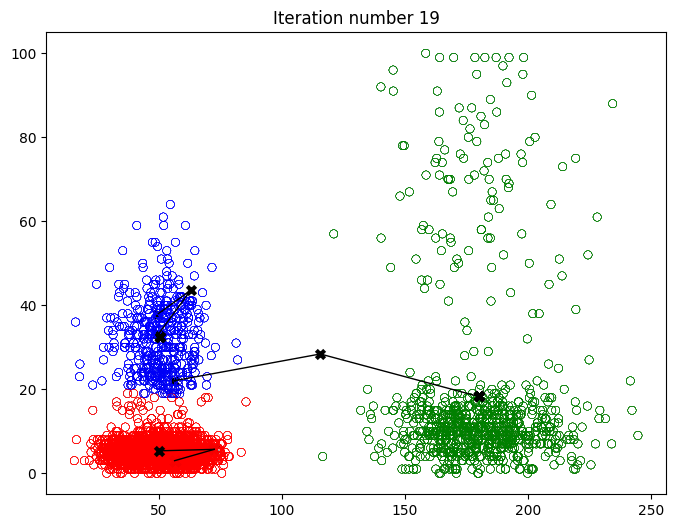

In [70]:
# Load an example dataset
X = data
K = 3
# Set initial centroids
initial_centroids = kMeans_init_centroids(X, K)
print(initial_centroids)

# Number of iterations
max_iters = 20
# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)